<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/RFB_RN_71.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow_addons as tfa
from tensorflow import keras
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[**Python**] - Verificar a versão do Tensorflow
> Assegurar que está a utilizar a versão 2.x.

In [2]:
tf.__version__

'2.3.0'

[**Python**] - Definir o número de casas decimais

In [3]:
np.set_printoptions(precision= 3)

### 1. Carregar os dados

[**Python**] - Carregar os dados:

In [4]:
# Leitura do dataframe:
df = pd.read_csv('/total_9.csv')

In [10]:
df_total = df.copy()

In [11]:
df_total.set_index('id', inplace=True)

In [12]:
df_total.columns

Index(['cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8',
       'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4', 'ind01',
       'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08', 'ind09',
       'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16', 'ind17',
       'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24', 'ind25',
       'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32', 'ind33',
       'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40', 'ind41',
       'ind42', 'ind43', 'target', 'cnae_secao', 'l_ind_1_mv', 'l_ind_2_mv',
       'l_mc_1_mv', 'md1_o', 'md2_o', 'md3_o', 'md4_o', 'md5_o', 'md7_o',
       'md8_o', 'md9_o', 'md10_o', 'md12_o', 'mc1_o', 'mc3_o', 'mc4_o'],
      dtype='object')

Retirando algumas colunas para testar

In [13]:
df_total.drop(columns = ['cnae2','md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8',
       'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4'], inplace = True)

In [14]:
df_total.columns

Index(['rf2', 'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07',
       'ind08', 'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15',
       'ind16', 'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23',
       'ind24', 'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31',
       'ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39',
       'ind40', 'ind41', 'ind42', 'ind43', 'target', 'cnae_secao',
       'l_ind_1_mv', 'l_ind_2_mv', 'l_mc_1_mv', 'md1_o', 'md2_o', 'md3_o',
       'md4_o', 'md5_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md12_o',
       'mc1_o', 'mc3_o', 'mc4_o'],
      dtype='object')

GET DUMMIES

In [ ]:
#df_total['cnae2'] = df_total['cnae2'].astype('category')

In [15]:
df_total = pd.get_dummies(df_total)

In [16]:
X_treino = df_total[df_total['target']!= 2]

In [17]:
df_X = X_treino.copy()

In [18]:
df_y = df_X['target']
df_X = df_X.drop(columns= ['target'])

In [19]:
X_test = df_total[df_total['target']== 2].drop(columns= ['target'])

Tratando o Balanceamento da Amostra

In [20]:
qtd = Counter(X_treino['target'])
qtd

Counter({0: 8513, 1: 2520})

In [21]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [22]:
over = SMOTE(sampling_strategy = 0.5) # Reamostrar a classe minoritária para ter 10% da classe majoritária
under = RandomUnderSampler(sampling_strategy = 0.85) # Seleciona a classe majoritária para ter 50%
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps = steps)

In [23]:
X, y = pipeline.fit_resample(df_X, df_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ANTES/DEPOIS:

In [24]:
print(Counter(df_y),Counter(y))

Counter({0: 8513, 1: 2520}) Counter({0: 5007, 1: 4256})


### 3. Definir as amostras de treinamento e validação

[**Python**] - Definir as amostras de treinamento e validação

In [25]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste= train_test_split(X, y, test_size = 0.1, random_state = 22091980) #20111974)
print(f'X: Treinamento=  {X_treinamento.shape}; X: Teste=  {X_teste.shape}')

X: Treinamento=  (8336, 88); X: Teste=  (927, 88)


In [26]:
print(f'Y: Treinamento =  {y_treinamento.shape}; Y: Teste = {y_teste.shape}')

Y: Treinamento =  (8336,); Y: Teste = (927,)


### 4. Definir a arquitetura da Rede Neural com _Tensorflow_/_Keras_

[**Python**] - Definir a arquitetura, ou seja:
* $N_{I}$: Número de neurônios na camada de entrada (_Input Layer_);
* $N_{O}$: Número de neurônios na camada de saída (_Output Layer_);
* $N_{H}$: Número de neurônios na camada escondida (_Hidden Layer_);
* FA: Função de ativação;

In [55]:
# Número de Neurônios na Input Layer:
N_I = 88

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 400

N_H2 = 200

N_H3=100

N_H4 = 50

N_H5 = 25

N_H6 = 2



# Função de Ativação da Hidden Layer:
FA_H = tf.nn.leaky_relu
#FA_H = tf.keras.activations.swish

# Função de Ativação da Output Layer:
FA_O = tf.keras.activations.sigmoid




[**Python**] - Definir as sementes para NumPy e Tensorflow:
> Por questões de reproducibilidade de resultados, use as sementes abaixo:

* NumPy: 20111974;
* Tensorflow: 20111974;

In [56]:
np.random.seed(19800922)
tf.random.set_seed(22091980)


[**Python**] - Definir a Rede Neural:





* 1 camada _dropout_ com $p= 0.1$:

In [57]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

RN= Sequential()
RN.add(Dense(N_H, input_dim= N_I, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(N_H2, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(N_H3, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(N_H4, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(N_H5, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(N_H6, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units= N_O, activation= FA_O))

# Resumo da arquitetura da Rede Neural
print(RN.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 400)               35600     
_________________________________________________________________
dropout_10 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)               

### 5. Compilar a Rede Neural

Este é um problema de classificação binária (_Male_ ou _Female_). Portanto, temos:
* optimizer= tf.keras.optimizers.Adam();
* loss=  tf.keras.losses.MeanSquaredError() ou loss= tf.keras.losses.BinaryCrossentropy(). Particularmente, eu gosto de usar loss=  tf.keras.losses.MeanSquaredError() porque o resultado é mais intuitivo;
* metrics= tf.keras.metrics.binary_accuracy.

[**Python**] - Comando modelo.compile(optimizer, loss, metrics):

In [58]:

Algoritmo_Opt = tf.keras.optimizers.Adamax()
#Algoritmo_Opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.99, epsilon=1e-07 , amsgrad=True,     name='Adam')
Loss_Function = tf.keras.losses.MeanSquaredError()
#Metrics_Perf = tf.keras.metrics.binary_accuracy
#Metrics_Perf = 2 * (tf.keras.metrics.Recall() * tf.keras.metrics.Precision())/(tf.keras.metrics.Recall() + tf.keras.metrics.Precision())
#recall = tf.keras.metrics.Recall()
#prec = tf.keras.metrics.Precision()
#Metrics_Perf = 2 * (prec * recall) / (prec + recall)
#Metrics_Perf = tfa.metrics.F1Score(     num_classes= 1 , name=  'f1_score',threshold=0.9  )
#F1 = 2 * (precision * recall) / (precision + recall)
Metrics_Perf = tf.keras.metrics.binary_accuracy
RN.compile(optimizer = Algoritmo_Opt, loss = Loss_Function,metrics = Metrics_Perf)
#RN.compile( loss = Loss_Function,metrics = Metrics_Perf)

### 6. Ajustar a Rede Neural

Obs.: A opção callbacks abaixo implementa o conceito de _early stopping_. Esta opção vai parar o processo de treinamento da Rede Neural antes de atingirmos o númerco de _epochs_ quando o modelo pára de melhorar, medido pela métrica val_loss. O parâmetro _patience_= k significa que o processo de otimização vai parar se tivermos k _epochs_ consecutivas sem observarmos melhoria da performance da Rede Neural.

[**Python**] - Comando modelo.fit(X_treinamento, y_treinamento, epochs)

In [59]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, min_delta = 0.001)]
hist= RN.fit(X_treinamento, y_treinamento, epochs = 100, 
             validation_data = (X_teste, y_teste), 
             callbacks = callbacks)

Epoch 1/100
261/261 [==============================] - 1s 4ms/step - loss: 0.2224 - binary_accuracy: 0.6314 - val_loss: 0.2087 - val_binary_accuracy: 0.6699
Epoch 2/100
261/261 [==============================] - 1s 4ms/step - loss: 0.2108 - binary_accuracy: 0.6540 - val_loss: 0.2066 - val_binary_accuracy: 0.6613
Epoch 3/100
261/261 [==============================] - 1s 4ms/step - loss: 0.2065 - binary_accuracy: 0.6659 - val_loss: 0.2059 - val_binary_accuracy: 0.6731
Epoch 4/100
261/261 [==============================] - 1s 4ms/step - loss: 0.2036 - binary_accuracy: 0.6774 - val_loss: 0.2041 - val_binary_accuracy: 0.6785
Epoch 5/100
261/261 [==============================] - 1s 4ms/step - loss: 0.1995 - binary_accuracy: 0.6856 - val_loss: 0.2012 - val_binary_accuracy: 0.6775
Epoch 6/100
261/261 [==============================] - 1s 4ms/step - loss: 0.1990 - binary_accuracy: 0.6874 - val_loss: 0.2009 - val_binary_accuracy: 0.6828
Epoch 7/100
261/261 [==============================] - 1s 

### 7. Avaliar a performance da Rede Neural

Para avaliar a a Rede Neural, simplesmente informamos as amostras de teste: X_teste e y_teste. A função evaluate() vai retornar uma lista contendo 2 valores: loss e accuracy.

[**Python**] - Comando modelo.evaluate(X_teste, y_teste)

In [60]:
def Mostra_ConfusionMatrix(X,y):
    y_pred = RN.predict_classes(X)
    mc = confusion_matrix(y, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

In [61]:
RN.evaluate(X_teste, y_teste)

29/29 [==============================] - 0s 1ms/step - loss: 0.1822 - binary_accuracy: 0.7389


[0.1822068840265274, 0.7389428019523621]

In [62]:
F1_Test=f1_score(y_teste, RN.predict_classes(X_teste), average="macro")
print(f'F1: {F1_Test}')

F1: 0.7389352313034736


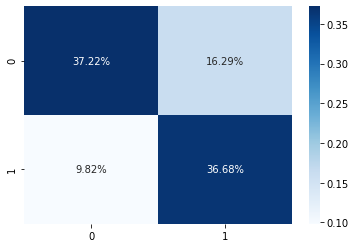

In [63]:
Mostra_ConfusionMatrix(X_teste, y_teste)

In [64]:
RN.evaluate(df_X, df_y)

345/345 [==============================] - 1s 2ms/step - loss: 0.1360 - binary_accuracy: 0.7979


[0.13596048951148987, 0.7978790998458862]

In [65]:
F1_X=f1_score(y, RN.predict_classes(X), average="macro")
print(f'F1: {F1_X}')

F1: 0.8651523470180995


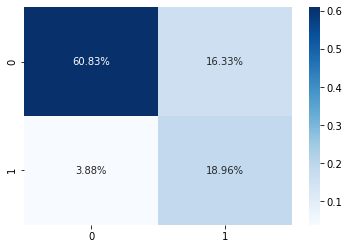

In [66]:
Mostra_ConfusionMatrix(df_X, df_y)

In [67]:
RN.evaluate(X_treinamento, y_treinamento)

261/261 [==============================] - 0s 1ms/step - loss: 0.0945 - binary_accuracy: 0.8796


[0.09451465308666229, 0.8795585632324219]

In [68]:
F1_Trein=f1_score(y_treinamento, RN.predict_classes(X_treinamento), average="macro")
print(f'F1: {F1_Trein}')

F1: 0.8791970550061662


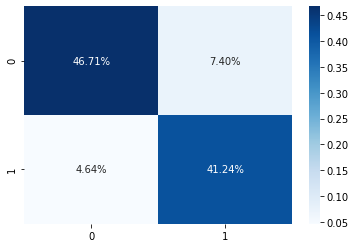

In [69]:
Mostra_ConfusionMatrix(X_treinamento, y_treinamento)

### 8. _Fine tuning_ da Rede Neural

Para aumentar a acurácia da Rede Neural, sugiro aumentarmos o número de neurônios na _Hidden Layer_ e/ou aumentar o número de _Hidden Layers_.

No entanto, obtivemos uma acurácia razoável com a Rede Neural _baseline_. Portanto, deixo como exercício para os alunos o desafio de melhorar a acurácia desta Rede Neural.

### 9. Fazer Predições com a Rede Neural

[**Python**] - Comando:
* RN.predict_classes(X_treinamento);
* RN.predict_classes(X_teste).

In [70]:
y_test = RN.predict_classes(X_test)


In [71]:
df_submit = pd.concat([pd.DataFrame(X_test.index,columns=['id']),pd.DataFrame(y_test,columns=['target']).astype('boolean')],axis=1)



In [72]:
df_submit.head()

,id,target
0,3411,True
1,2177,True
2,8400,False
3,464,True
4,6672,False


In [73]:
df_submit['target'].value_counts()

False    607
True     393
Name: target, dtype: Int64

In [74]:
F = df_submit['target'].value_counts()[0]
T = df_submit['target'].value_counts()[1]

In [75]:
df_submit.to_csv(f'/PyLadies_NL_71_Test_{round(F1_Test,4)}_X_{round(F1_X,4)}_Trein_{round(F1_Trein,4)}_F{F}_T{T}.csv',index = False, sep = ',')

### Salvar a Rede Neural

In [76]:
# Save the weights
RN.save('/RN_71.h5')